In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%cd /content/drive/My Drive/MNIST/Kannada_MNIST

/content/drive/My Drive/MNIST/Kannada_MNIST


In [0]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_df = copy.copy(train_data)
test_df = copy.copy(test_data)

In [0]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
print(train_data.isnull().values.sum() != 0)
print(test_data.isnull().values.sum() != 0)

False
False


In [0]:
ID = test_data["id"]
test_df = test_data.drop(["id"], axis=1)

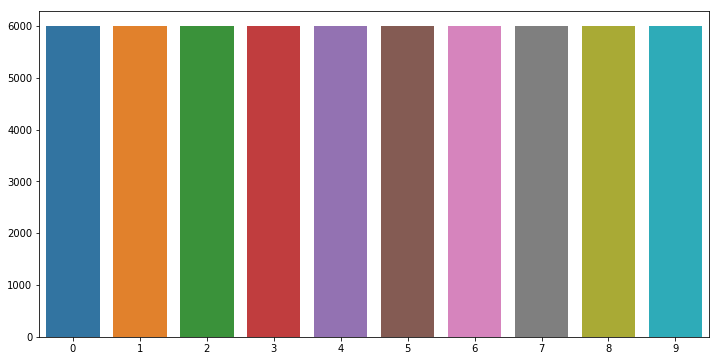

In [43]:
label = train_df["label"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=label.index,y=label.values)

In [0]:
x = train_data.drop(["label"], axis=1)
y = train_data["label"]

In [0]:
x_img = x.values.reshape(x.shape[0], 28, 28)

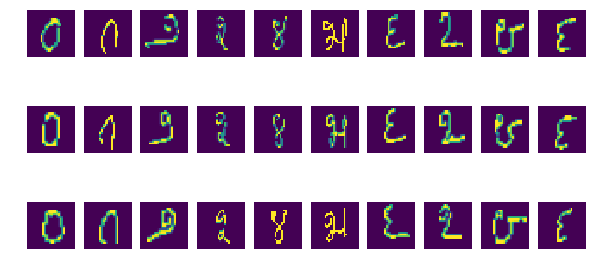

In [46]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
i = 1

for num in range(0,30):
  ax = fig.add_subplot(3, 10, i)
  ax.imshow(x_img[num])
  ax.set_axis_off()
  i += 1
plt.show()

In [0]:
x = x.values.reshape(x.shape[0], 28, 28,1)
test_df = test_df.values.reshape(test_df.shape[0], 28, 28,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(
        rotation_range= 7,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
datagen.fit(x)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D
from keras.utils.np_utils import to_categorical

In [0]:
y = to_categorical(y, num_classes=10)

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
checkpoint = ModelCheckpoint("BWeight.md5",monitor="val_loss",
                            save_best_only=True)

In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32,kernel_size=5,strides=2,padding="same",activation="relu"))
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=5,strides=2,padding="same",activation="relu"))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [0]:
batch_size = 64

history = model.fit_generator(datagen.flow(x_train, y_train,  batch_size=batch_size),
                              epochs = 100,
                              validation_data = (x_test, y_test),
                              verbose = 2,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 - 28s - loss: 0.5146 - acc: 0.8246 - val_loss: 0.0485 - val_acc: 0.9884
Epoch 2/100
 - 27s - loss: 0.1159 - acc: 0.9705 - val_loss: 0.0315 - val_acc: 0.9912
Epoch 3/100
 - 27s - loss: 0.0901 - acc: 0.9769 - val_loss: 0.0244 - val_acc: 0.9936
Epoch 4/100
 - 27s - loss: 0.0783 - acc: 0.9805 - val_loss: 0.0254 - val_acc: 0.9932
Epoch 5/100
 - 27s - loss: 0.0726 - acc: 0.9813 - val_loss: 0.0244 - val_acc: 0.9937
Epoch 6/100
 - 27s - loss: 0.0622 - acc: 0.9841 - val_loss: 0.0209 - val_acc: 0.9943
Epoch 7/100
 - 27s - loss: 0.0667 - acc: 0.9836 - val_loss: 0.0230 - val_acc: 0.9944
Epoch 8/100
 - 27s - loss: 0.0605 - acc: 0.9849 - val_loss: 0.0199 - val_acc: 0.9945
Epoch 9/100
 - 27s - loss: 0.0543 - acc: 0.9868 - val_loss: 0.0200 - val_acc: 0.9941
Epoch 10/100
 - 26s - loss: 0.0557 - acc: 0.9858 - val_loss: 0.0211 - val_acc: 0.9943
Epoch 11/100
 - 27s - loss: 0.0578 - acc: 0.9853 - val_

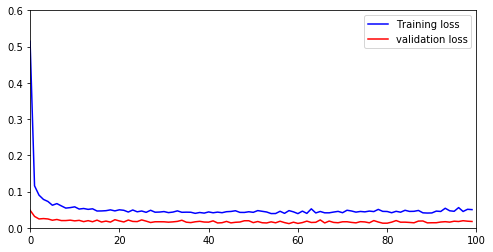

In [0]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 0.6)
plt.legend(loc='best')

In [0]:
model.load_weights('BWeight.md5')

In [0]:
ex_data = pd.read_csv("Dig-MNIST.csv")

In [0]:
ex_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_ex = ex_data.drop(["label"], axis=1)
y_ex = ex_data["label"]

In [0]:
x_ex = x_ex.values.reshape(x_ex.shape[0], 28, 28, 1)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_ex, model.predict_classes(x_ex)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1024
           1       0.93      0.76      0.84      1024
           2       0.84      0.92      0.88      1024
           3       0.96      0.80      0.87      1024
           4       0.94      0.90      0.92      1024
           5       0.94      0.95      0.94      1024
           6       0.74      0.84      0.78      1024
           7       0.67      0.82      0.73      1024
           8       0.95      0.89      0.92      1024
           9       0.85      0.92      0.88      1024

    accuracy                           0.85     10240
   macro avg       0.86      0.85      0.85     10240
weighted avg       0.86      0.85      0.85     10240



In [0]:
pred = model.predict_classes(test_df)

In [0]:
submission = pd.DataFrame({ 'id': ID,
                            'label': pred })
submission.to_csv(path_or_buf ="submission.csv", index=False)